In [26]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization library
import matplotlib.pyplot as plt # visualization library
import plotly.plotly as py # visualization library
from plotly.offline import init_notebook_mode, iplot # plotly offline mode
init_notebook_mode(connected=True) 
import plotly.graph_objs as go # plotly graphical object

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import os
print(os.listdir("../input"))
# import warnings library
import warnings        
# ignore filters
warnings.filterwarnings("ignore") # if there is a warning after some codes, this will avoid us to see them.
plt.style.use('ggplot') # style of plots. ggplot is one of the most used style, I also like it.
# Any results you write to the current directory are saved as output.

['weatherww2', 'world-war-ii', 'data-th']


In [27]:
#Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
 
from sklearn.decomposition import PCA
from sklearn.mixture import BayesianGaussianMixture,GaussianMixture
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import metrics
import lightgbm as lgb
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [28]:
 
ck = pd.read_csv("../input/data-th/Gia SMP va SMPcap 2021(Gi th trng SMP).csv",encoding = "latin-1",sep = ";")
ck.head()

,Ngày,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,01/01/2021,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,...,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4
1,01/02/2021,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,...,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7
2,01/03/2021,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,...,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4
3,01/04/2021,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.1,...,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8
4,01/05/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5


In [29]:
print(2151264652%16+1)
print(2151264652%16+2)
print(2151264652%16+3)

13
14
15


In [30]:
ck = ck.iloc[:,[0,13,14,15]]
ck.head()

,Ngày,13,14,15
0,01/01/2021,964.4,964.4,964.4
1,01/02/2021,1019.7,1019.7,1019.7
2,01/03/2021,988.4,988.4,988.4
3,01/04/2021,1010.8,1010.8,1010.8
4,01/05/2021,1061.5,1061.5,1061.5


In [31]:
ck.describe()

,13,14,15
count,365.000000,365.000000,365.000000
mean,1040.312329,1040.314521,1040.321918
std,105.146765,105.145787,105.144258
min,885.700000,885.700000,885.600000
25%,988.400000,988.400000,988.400000
50%,1022.600000,1022.600000,1022.600000
75%,1061.500000,1061.600000,1061.600000
max,1565.500000,1565.500000,1565.500000


In [32]:
 # Chuyển đổi cột ngày tháng năm thành kiểu dữ liệu datetime
ck['Ngày'] = pd.to_datetime(ck['Ngày'])

# Tách cột ngày tháng năm thành các cột riêng lẻ
ck['ngay'] = ck['Ngày'].dt.day
ck['thang'] = ck['Ngày'].dt.month
ck['nam'] = ck['Ngày'].dt.year

# Hiển thị DataFrame kết quả
print(ck)

          Ngày      13      14      15  ngay  thang   nam
0   2021-01-01   964.4   964.4   964.4     1      1  2021
1   2021-01-02  1019.7  1019.7  1019.7     2      1  2021
2   2021-01-03   988.4   988.4   988.4     3      1  2021
3   2021-01-04  1010.8  1010.8  1010.8     4      1  2021
4   2021-01-05  1061.5  1061.5  1061.5     5      1  2021
5   2021-01-06  1061.5  1061.5  1061.5     6      1  2021
6   2021-01-07  1061.5  1061.5  1061.5     7      1  2021
7   2021-01-08  1061.5  1061.5  1061.5     8      1  2021
8   2021-01-09  1064.1  1064.1  1064.1     9      1  2021
9   2021-01-10   966.7   966.7   966.7    10      1  2021
10  2021-01-11  1002.0  1002.0  1002.1    11      1  2021
11  2021-01-12  1066.6  1066.6  1066.6    12      1  2021
12  2021-01-13  1061.5  1061.5  1061.5    13      1  2021
13  2021-01-14  1061.5  1061.5  1061.5    14      1  2021
14  2021-01-15  1061.5  1061.6  1061.6    15      1  2021
15  2021-01-16  1066.6  1066.6  1066.6    16      1  2021
16  2021-01-17

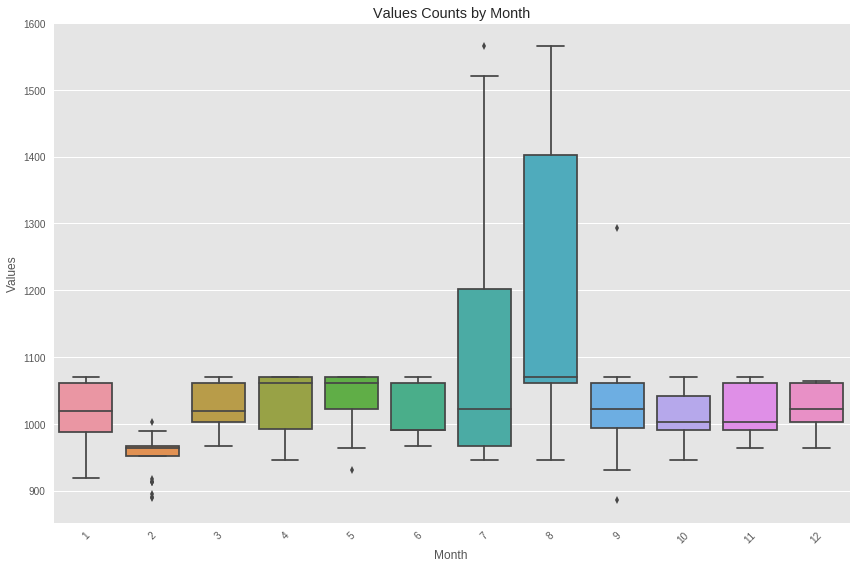

In [33]:
plt.figure(figsize=(12,8),  facecolor='white')
 
sns.boxplot(x='thang', y='13', data=ck)
plt.xticks(rotation=45)
plt.title('Values Counts by Month')
plt.xlabel('Month')
plt.ylabel('Values')
plt.tight_layout()
plt.show() 

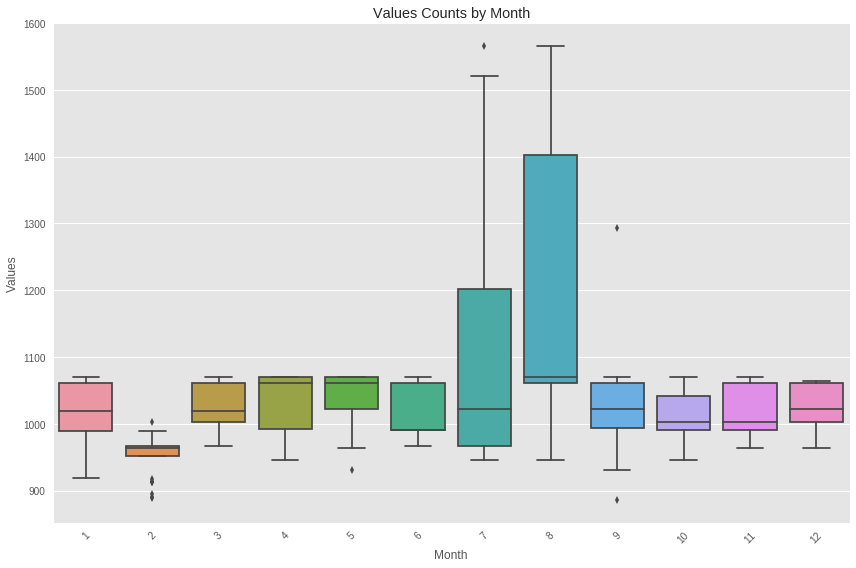

In [42]:
plt.figure(figsize=(12,8),  facecolor='white')
 
sns.boxplot(x='thang', y='14', data=ck)
plt.xticks(rotation=45)
plt.title('Values Counts by Month')
plt.xlabel('Month')
plt.ylabel('Values')
plt.tight_layout()
plt.show() 

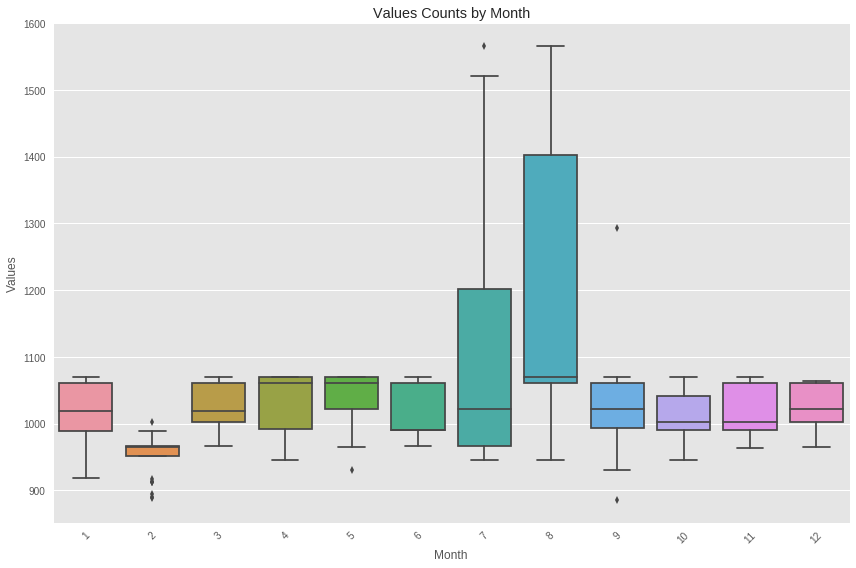

In [34]:
plt.figure(figsize=(12,8),  facecolor='white')
 
sns.boxplot(x='thang', y='15', data=ck)
plt.xticks(rotation=45)
plt.title('Values Counts by Month')
plt.xlabel('Month')
plt.ylabel('Values')
plt.tight_layout()
plt.show() 

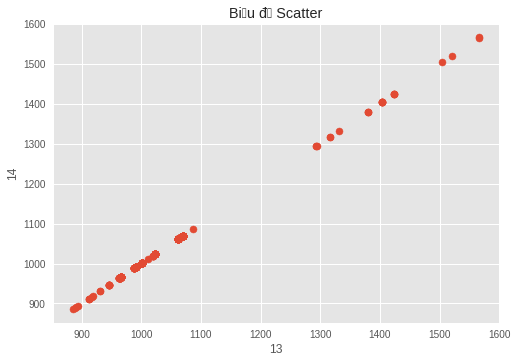

In [52]:
x = ck['13']
y = ck['14']
# Vẽ biểu đồ scatter
plt.scatter(x, y)

# Đặt tên cho trục x và trục y
plt.xlabel('13')
plt.ylabel('14')

# Đặt tiêu đề cho biểu đồ
plt.title('Biểu đồ Scatter')

# Hiển thị biểu đồ
plt.show()

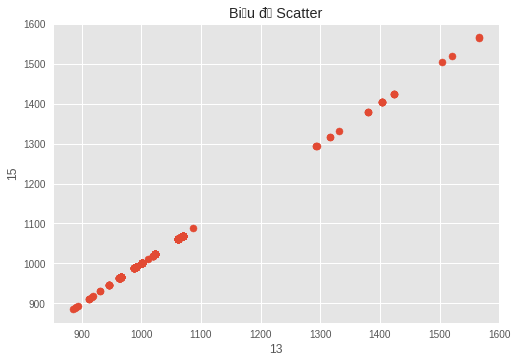

In [53]:
x = ck['13']
y = ck['15']
# Vẽ biểu đồ scatter
plt.scatter(x, y)

# Đặt tên cho trục x và trục y
plt.xlabel('13')
plt.ylabel('15')

# Đặt tiêu đề cho biểu đồ
plt.title('Biểu đồ Scatter')

# Hiển thị biểu đồ
plt.show()

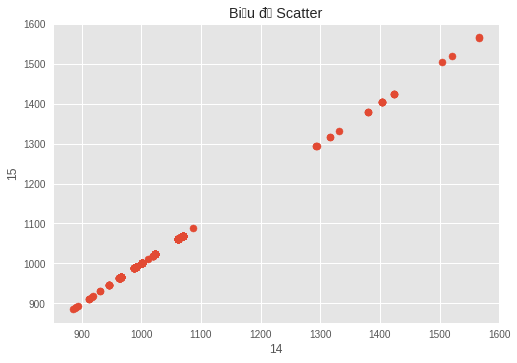

In [54]:
x = ck['14']
y = ck['15']
# Vẽ biểu đồ scatter
plt.scatter(x, y)

# Đặt tên cho trục x và trục y
plt.xlabel('14')
plt.ylabel('15')

# Đặt tiêu đề cho biểu đồ
plt.title('Biểu đồ Scatter')

# Hiển thị biểu đồ
plt.show()

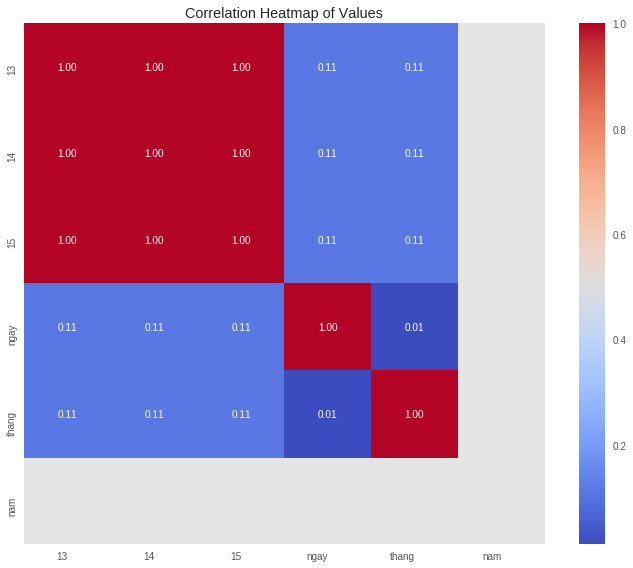

In [55]:
# Calculate the correlation matrix
 
corr = ck.corr()

# Generate a heatmap
plt.figure(figsize=(10,8), facecolor='white')
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Values')
plt.xticks( ha='right')
plt.yticks()
plt.tight_layout()
plt.show()

Text(0.5,1,'Trung bình giá trị mỗi tháng')

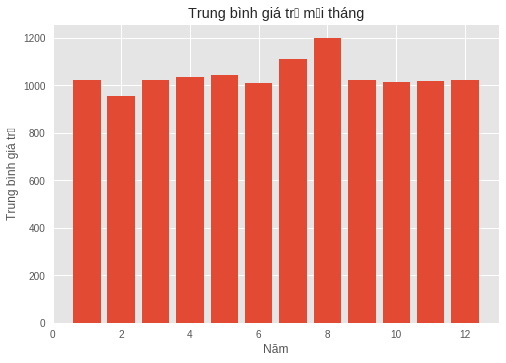

In [37]:

ck_mean = ck.groupby("thang")["13"].mean()# Vẽ biểu đồ cột
plt.bar(ck_mean.index, ck_mean)
plt.xlabel("Năm")
plt.ylabel("Trung bình giá trị")
plt.title("Trung bình giá trị mỗi tháng")

Text(0.5,1,'Trung bình giá trị mỗi tháng')

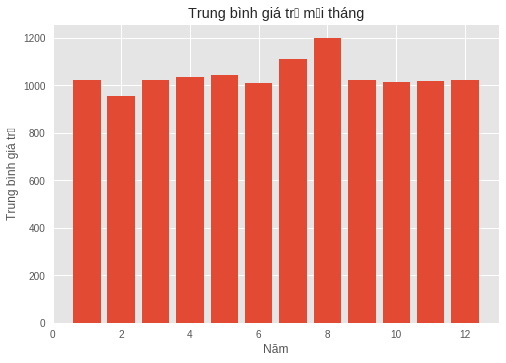

In [44]:
ck_mean = ck.groupby("thang")["14"].mean()# Vẽ biểu đồ cột
plt.bar(ck_mean.index, ck_mean)
plt.xlabel("Năm")
plt.ylabel("Trung bình giá trị")
plt.title("Trung bình giá trị mỗi tháng")

Text(0.5,1,'Trung bình giá trị mỗi tháng')

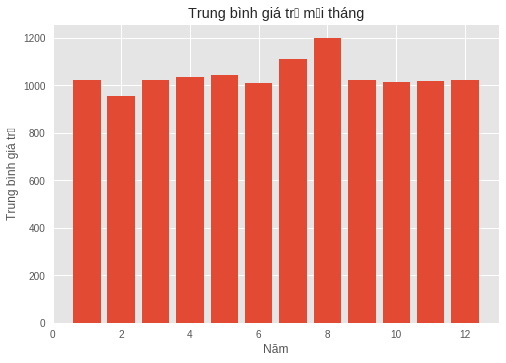

In [38]:
ck_mean = ck.groupby("thang")["15"].mean()# Vẽ biểu đồ cột
plt.bar(ck_mean.index, ck_mean)
plt.xlabel("Năm")
plt.ylabel("Trung bình giá trị")
plt.title("Trung bình giá trị mỗi tháng")

In [48]:
ck_new = ck.iloc[:,[1,2,3]]
ck_new.head()

,13,14,15
0,964.4,964.4,964.4
1,1019.7,1019.7,1019.7
2,988.4,988.4,988.4
3,1010.8,1010.8,1010.8
4,1061.5,1061.5,1061.5


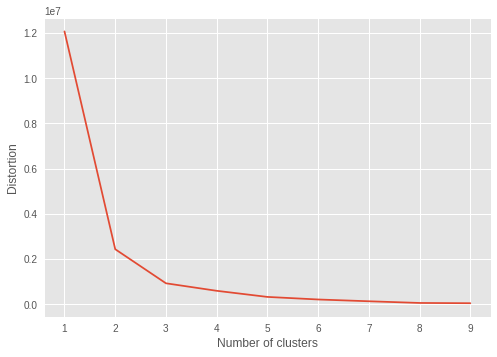

In [49]:
ck_new = ck.iloc[:,[1,2,3]]
ck_new.head()
wcss = [] 
for i in range(1,10): 
     kmeans = KMeans(n_clusters = i )
     kmeans.fit(ck_new.values.reshape(-1,1)) 
     wcss.append(kmeans.inertia_)
    
plt.plot(range(1,10),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('Distortion') 
plt.show()

choose k = 5

In [57]:
kmeans = KMeans(n_clusters = 5 )
kmeans.fit(ck_new.values.reshape(-1,1))
test_labels = kmeans.predict(ck_new.values.reshape(-1,1))
print(test_labels)

[2 2 2 ... 3 3 3]


In [60]:
 

# Khởi tạo mô hình KMeans với số cụm là 5
kmeans = KMeans(n_clusters=5, init='k-means++' )

# Huấn luyện mô hình
for i in range(5):   
    kmeans.fit(ck_new.values.reshape(-1,1))
    print(f"Iteration {i+1}:")
    print("Centers:", kmeans.cluster_centers_)
    print("Labels:", kmeans.labels_)
    print("\n")

# Kết quả cuối cùng
print("Final centers:", kmeans.cluster_centers_)
print("Final labels:", kmeans.labels_)


Iteration 1:
Centers: [[ 955.70875   ]
 [1373.36842105]
 [1065.44206349]
 [1538.55      ]
 [1005.62377451]]
Labels: [0 0 0 ... 4 4 4]


Iteration 2:
Centers: [[1065.44206349]
 [1373.36842105]
 [ 955.70875   ]
 [1538.55      ]
 [1005.62377451]]
Labels: [2 2 2 ... 4 4 4]


Iteration 3:
Centers: [[ 955.70875   ]
 [1373.36842105]
 [1065.44206349]
 [1005.62377451]
 [1538.55      ]]
Labels: [0 0 0 ... 3 3 3]


Iteration 4:
Centers: [[1005.62377451]
 [1373.36842105]
 [1065.44206349]
 [1538.55      ]
 [ 955.70875   ]]
Labels: [4 4 4 ... 0 0 0]


Iteration 5:
Centers: [[ 955.70875   ]
 [1065.44206349]
 [1373.36842105]
 [1005.62377451]
 [1538.55      ]]
Labels: [0 0 0 ... 3 3 3]


Final centers: [[ 955.70875   ]
 [1065.44206349]
 [1373.36842105]
 [1005.62377451]
 [1538.55      ]]
Final labels: [0 0 0 ... 3 3 3]


In [58]:
gmm = GaussianMixture(n_components = 5) 
gmm.fit(ck_new.values.reshape(-1,1)) 
test_labels = gmm.predict(ck_new.values.reshape(-1,1))
print(test_labels)

[0 0 0 ... 3 3 3]


In [88]:
# Khởi tạo mô hình KMeans với số cụm là 5
gmm = GaussianMixture(n_components = 5)
gmm.fit(ck_new.values.reshape(-1,1))
# In các nhãn và các tâm cụm sau mỗi vòng lặp
for i in range(1, 11):  # 10 vòng lặp
    gmm.n_init = i  # Đặt số lượng vòng lặp cho việc khởi tạo ngẫu nhiên mô hình
    gmm.fit(ck_new.values.reshape(-1,1))
    
    # In các nhãn sau mỗi vòng lặp
    labels = gmm.predict(ck_new.values.reshape(-1,1))
    print(f"Labels after {i} iterations:", labels)
    
    # In các tâm cụm sau mỗi vòng lặp
    means = gmm.means_
    print(f"Cluster centers after {i} iterations:", means)

Labels after 1 iterations: [0 0 0 ... 0 0 0]
Cluster centers after 1 iterations: [[ 992.15993242]
 [1375.0696583 ]
 [1065.27375262]
 [ 919.29237885]
 [1540.5395785 ]]
Labels after 2 iterations: [2 2 2 ... 3 3 3]
Cluster centers after 2 iterations: [[1065.2686338 ]
 [1375.12702566]
 [ 973.64663355]
 [1007.48377352]
 [1540.60923955]]
Labels after 3 iterations: [3 3 3 ... 3 3 3]
Cluster centers after 3 iterations: [[ 919.29237885]
 [1375.0696583 ]
 [1065.27375262]
 [ 992.15993242]
 [1540.5395785 ]]
Labels after 4 iterations: [2 2 2 ... 2 2 2]
Cluster centers after 4 iterations: [[1065.27375245]
 [1425.63999903]
 [ 992.15988574]
 [ 919.29239466]
 [1304.39635792]]
Labels after 5 iterations: [4 4 4 ... 3 3 3]
Cluster centers after 5 iterations: [[ 925.44145246]
 [1065.26589001]
 [1388.84410165]
 [1005.53188935]
 [ 965.59154882]]
Labels after 6 iterations: [3 3 3 ... 4 4 4]
Cluster centers after 6 iterations: [[ 995.96019204]
 [1392.98526816]
 [1065.26659666]
 [ 969.24665581]
 [1022.6       ]

In [77]:
ck_new.head()

,13,14,15
0,964.4,964.4,964.4
1,1019.7,1019.7,1019.7
2,988.4,988.4,988.4
3,1010.8,1010.8,1010.8
4,1061.5,1061.5,1061.5


In [79]:
 
class KalmanFilter3D:
    def __init__(self, initial_state, initial_covariance, transition_matrix, observation_matrix, process_noise_covariance, observation_noise_covariance):
        self.state = initial_state
        self.covariance = initial_covariance
        self.transition_matrix = transition_matrix
        self.observation_matrix = observation_matrix
        self.process_noise_covariance = process_noise_covariance
        self.observation_noise_covariance = observation_noise_covariance

    def predict(self):
        # Dự đoán trạng thái tiếp theo
        self.state = np.dot(self.transition_matrix, self.state)
        # Dự đoán ma trận hiệp phương sai tiếp theo
        self.covariance = np.dot(np.dot(self.transition_matrix, self.covariance), self.transition_matrix.T) + self.process_noise_covariance

    def update(self, observation):
        # Tính ma trận hiệp phương sai của dự đoán đo lường
        innovation_covariance = np.dot(np.dot(self.observation_matrix, self.covariance), self.observation_matrix.T) + self.observation_noise_covariance
        # Tính ma trận Kalman Gain
        kalman_gain = np.dot(np.dot(self.covariance, self.observation_matrix.T), np.linalg.inv(innovation_covariance))
        # Cập nhật trạng thái với thông tin đo lường mới
        innovation = observation - np.dot(self.observation_matrix, self.state)
        self.state = self.state + np.dot(kalman_gain, innovation)
        # Cập nhật ma trận hiệp phương sai
        self.covariance = self.covariance - np.dot(np.dot(kalman_gain, self.observation_matrix), self.covariance)

# Các giá trị ban đầu
initial_state = np.array([[0], [0], [0]])  # Vị trí ban đầu
initial_covariance = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])  # Ma trận hiệp phương sai ban đầu
transition_matrix = np.array([[1, 0, 0.1], [0, 1, 0.1], [0, 0, 1]])  # Ma trận chuyển đổi trạng thái
observation_matrix = np.eye(3)  # Ma trận quan sát, giả sử chúng ta quan sát toàn bộ trạng thái
process_noise_covariance = np.eye(3) * 0.01  # Ma trận nhiễu quá trình
observation_noise_covariance = np.eye(3) * 0.1  # Ma trận nhiễu quan sát

# Khởi tạo bộ lọc Kalman
kf = KalmanFilter3D(initial_state, initial_covariance, transition_matrix, observation_matrix, process_noise_covariance, observation_noise_covariance)

# Dữ liệu đo lường (ví dụ: vị trí quan sát được)
observations =  numpy_array = ck[['13', '14', '15']].values
# Dự đoán và cập nhật sử dụng bộ lọc Kalman cho mỗi mẫu dữ liệu
for obs in observations:
    for observation in obs:
        kf.predict()
        kf.update(observation)
    print("Predicted state:", kf.state)


Predicted state: [[1027.00771327]
 [1027.00771327]
 [ 935.5434691 ]]
Predicted state: [[1171.36335882]
 [1171.36335882]
 [ 967.33659026]]
Predicted state: [[1208.13719528]
 [1208.13719528]
 [ 940.38667   ]]
Predicted state: [[1237.83962034]
 [1237.83962034]
 [ 942.10304888]]
Predicted state: [[1286.0231922 ]
 [1286.0231922 ]
 [ 974.81864711]]
Predicted state: [[1305.67271034]
 [1305.67271034]
 [ 982.91182512]]
Predicted state: [[1313.33013771]
 [1313.33013771]
 [ 984.20811527]]
Predicted state: [[1316.18952505]
 [1316.18952505]
 [ 984.00298898]]
Predicted state: [[1319.1107979 ]
 [1319.1107979 ]
 [ 985.44606478]]
Predicted state: [[1249.10656042]
 [1249.10656042]
 [ 918.93021155]]
Predicted state: [[1245.1752013 ]
 [1245.1752013 ]
 [ 924.15511165]]
Predicted state: [[1291.26171133]
 [1291.26171133]
 [ 970.78450522]]
Predicted state: [[1307.31073856]
 [1307.31073856]
 [ 980.89194027]]
Predicted state: [[1313.79080034]
 [1313.79080034]
 [ 983.2864148 ]]
Predicted state: [[1316.35055329]
